## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [149]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [150]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Credit_Amount', ylabel='Count'>

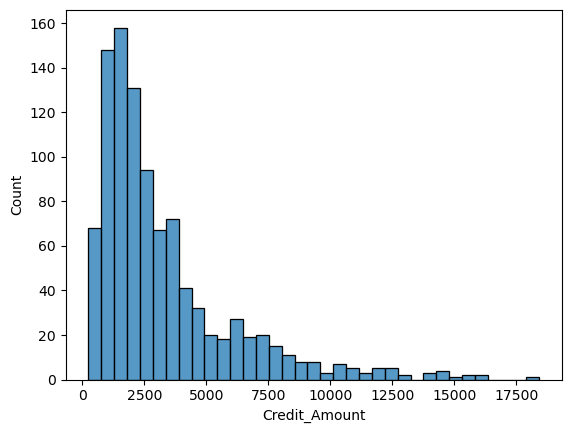

In [151]:
sns.histplot(data.Credit_Amount)

In [152]:
# Удаляем выбросы
data = data[data.Credit_Amount <= 15000]

<Axes: >

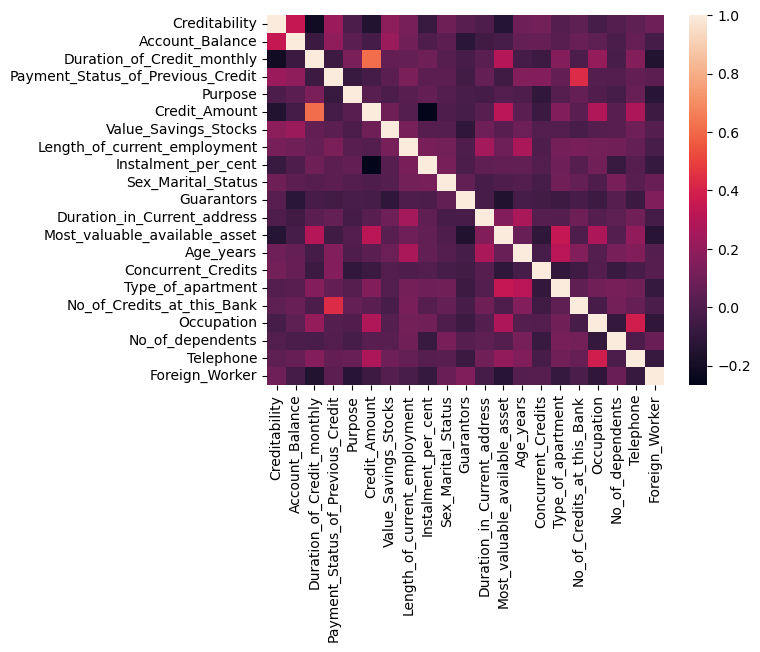

In [153]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

In [154]:
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [155]:
X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

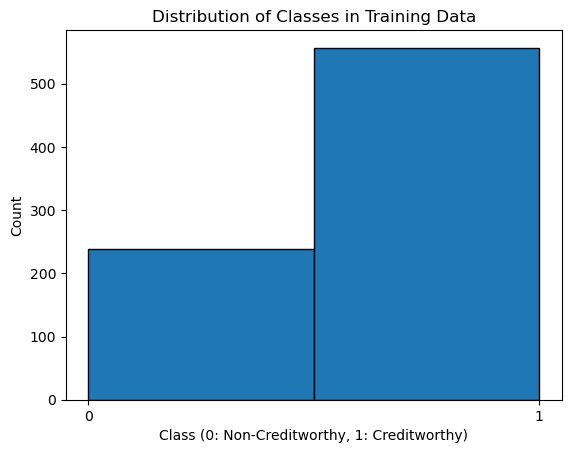

In [156]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [157]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=250, max_features=12, min_samples_split=3, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.71
Accuracy: 0.79
Precision: 0.82
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.71
Accuracy: 0.80
Precision: 0.82
Recall: 0.93


In [158]:
# Перебор кол-ва деревьев случайного леса
for i in [5, 10, 50, 100, 200, 250, 300, 500]:
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_roc_auc = roc_auc_score(y_test, rf_pred)
    print(f"ROC AUC при {i} деревьев: {rf_roc_auc:.3f}")


ROC AUC при 5 деревьев: 0.629
ROC AUC при 10 деревьев: 0.645
ROC AUC при 50 деревьев: 0.666
ROC AUC при 100 деревьев: 0.659
ROC AUC при 200 деревьев: 0.673
ROC AUC при 250 деревьев: 0.677
ROC AUC при 300 деревьев: 0.663
ROC AUC при 500 деревьев: 0.661


In [159]:
# Перебор максимальной глубины случайного леса
for i in [3, 5, 10, 15, None]:
    rf_model = RandomForestClassifier(n_estimators=250, max_depth=i, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_roc_auc = roc_auc_score(y_test, rf_pred)
    print(f"ROC AUC при глубине {i}: {rf_roc_auc:.3f}")

ROC AUC при глубине 3: 0.531
ROC AUC при глубине 5: 0.598
ROC AUC при глубине 10: 0.671
ROC AUC при глубине 15: 0.669
ROC AUC при глубине None: 0.677


In [160]:
# Перебор минимального кол-ва элементов для разбиения внутренней вершины случайного леса
for i in [2, 3, 4]:
    rf_model = RandomForestClassifier(n_estimators=250, min_samples_split=i, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_roc_auc = roc_auc_score(y_test, rf_pred)
    print(f"ROC AUC при min_samples_split = {i}: {rf_roc_auc:.3f}")

ROC AUC при min_samples_split = 2: 0.677
ROC AUC при min_samples_split = 3: 0.699
ROC AUC при min_samples_split = 4: 0.678


In [161]:
# Перебор макс. кол-ва признаков для случайного леса
for i in ["sqrt", 5, 6, 7, 10, 12, 15, 17, None]:
    rf_model = RandomForestClassifier(n_estimators=250, min_samples_split=3, max_features=i, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_roc_auc = roc_auc_score(y_test, rf_pred)
    print(f"ROC AUC при min_samples_split = {i}: {rf_roc_auc:.3f}")

ROC AUC при min_samples_split = sqrt: 0.699
ROC AUC при min_samples_split = 5: 0.692
ROC AUC при min_samples_split = 6: 0.676
ROC AUC при min_samples_split = 7: 0.700
ROC AUC при min_samples_split = 10: 0.704
ROC AUC при min_samples_split = 12: 0.709
ROC AUC при min_samples_split = 15: 0.690
ROC AUC при min_samples_split = 17: 0.705
ROC AUC при min_samples_split = None: 0.709


In [162]:
# Перебор кол-ва деревьев градиентного бустинга
for i in [5, 10, 50, 100, 200, 250, 300, 500]:
    gb_model = GradientBoostingClassifier(n_estimators=i, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_roc_auc = roc_auc_score(y_test, gb_pred)
    print(f"ROC AUC при {i} деревьев: {gb_roc_auc:.3f}")

ROC AUC при 5 деревьев: 0.500
ROC AUC при 10 деревьев: 0.545
ROC AUC при 50 деревьев: 0.675
ROC AUC при 100 деревьев: 0.715
ROC AUC при 200 деревьев: 0.674
ROC AUC при 250 деревьев: 0.660
ROC AUC при 300 деревьев: 0.669
ROC AUC при 500 деревьев: 0.680


In [163]:
# Перебор глубины градиентного бустинга
for i in [3, 5, 10, 15, None]:
    gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=i, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_roc_auc = roc_auc_score(y_test, gb_pred)
    print(f"ROC AUC при глубине {i}: {gb_roc_auc:.3f}")

ROC AUC при глубине 3: 0.715
ROC AUC при глубине 5: 0.693
ROC AUC при глубине 10: 0.679
ROC AUC при глубине 15: 0.650
ROC AUC при глубине None: 0.692


In [164]:
# Перебор минимального кол-ва элементов для разбиения внутренней вершины GB
for i in [2, 3, 4]:
    gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_split=i, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_roc_auc = roc_auc_score(y_test, gb_pred)
    print(f"ROC AUC при min_samples_split {i}: {gb_roc_auc:.3f}")

ROC AUC при min_samples_split 2: 0.715
ROC AUC при min_samples_split 3: 0.695
ROC AUC при min_samples_split 4: 0.695


In [165]:
# Перебор макс. кол-ва признаков для GB
for i in ["sqrt", 5, 6, 7, 10, 12, 15, 17, None]:
    gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, max_features=i, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_roc_auc = roc_auc_score(y_test, gb_pred)
    print(f"ROC AUC при min_samples_split {i}: {gb_roc_auc:.3f}")

ROC AUC при min_samples_split sqrt: 0.678
ROC AUC при min_samples_split 5: 0.661
ROC AUC при min_samples_split 6: 0.664
ROC AUC при min_samples_split 7: 0.664
ROC AUC при min_samples_split 10: 0.694
ROC AUC при min_samples_split 12: 0.707
ROC AUC при min_samples_split 15: 0.678
ROC AUC при min_samples_split 17: 0.674
ROC AUC при min_samples_split None: 0.715


In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(170,), max_iter=150, random_state=42, alpha=0.001)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.75
Accuracy: 0.80
Precision: 0.85
Recall: 0.88


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [168]:
# Подбор кол-ва нейронов
for i in [10, 30, 50, 100, 150, 170, 200, 300]:
    mlp_model = MLPClassifier(hidden_layer_sizes=(i,), max_iter=150, random_state=42)
    mlp_model.fit(X_train, y_train)
    mlp_pred = mlp_model.predict(X_test)
    mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
    print(f"ROC AUC при {i} нейронов: {mlp_roc_auc:.3f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 10 нейронов: 0.699
ROC AUC при 30 нейронов: 0.720


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 50 нейронов: 0.714


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 100 нейронов: 0.721


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 150 нейронов: 0.736


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 170 нейронов: 0.741


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 200 нейронов: 0.736
ROC AUC при 300 нейронов: 0.720


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [169]:
# Подбор макс. итераций
for i in [50, 100, 150, 200, 300, 400, 500, 600, 700]:
    mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=i, random_state=42)
    mlp_model.fit(X_train, y_train)
    mlp_pred = mlp_model.predict(X_test)
    mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
    print(f"ROC AUC при {i} итераций: {mlp_roc_auc:.3f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 50 итераций: 0.673
ROC AUC при 100 итераций: 0.707


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 150 итераций: 0.720


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 200 итераций: 0.713


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 300 итераций: 0.693


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 400 итераций: 0.686


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 500 итераций: 0.679


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при 600 итераций: 0.692
ROC AUC при 700 итераций: 0.673


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [170]:
# Подбор параметра регуляризации
for i in [0.0001, 0.001, 0.00001]:
    mlp_model = MLPClassifier(hidden_layer_sizes=(170,), max_iter=150, random_state=42, alpha=i)
    mlp_model.fit(X_train, y_train)
    mlp_pred = mlp_model.predict(X_test)
    mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
    print(f"ROC AUC при alpha = {i}: {mlp_roc_auc:.3f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при alpha = 0.0001: 0.741


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC при alpha = 0.001: 0.750
ROC AUC при alpha = 1e-05: 0.741


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели